# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [15]:
import pandas as pd
df = pd.read_csv('human_body_temperature.csv')
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


## 1) Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

Central Limit Theorem states that a sample of large enough size (n>=30) is approximately normally distributed, regardless of its distribution. However, I will test for normality, first visually and then mathematically.

### Visual Normality Test

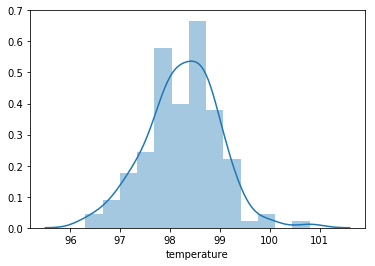

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
temperature=df['temperature']
sns.distplot(temperature)
plt.show()

## Mathematical Normality Test

In [17]:
import scipy.stats as stats
stats.mstats.normaltest(temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Examining the plot above, we can see that the distribution of body temperatures is apporximately normal. This is further confirmed by the normality test that follows. With a p value of 0.25, we cannot reject the null hypothesis that the sample comes from a normally distributed population. 

## 2) Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [18]:
n=temperature.count()
n

130

The rule of thumb for a 'large' sample size under Central Limit Theorem is n>=30. Our sample size of 130 exceeds this expectation.

Observations from different individuals can be considered independent.

## 3) Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

With a sample size of over 30, testing the sample against a a single value, I will use a one-sample z-test. My null hypothesis will be that 98.6 is the population mean. I will use an alpha of 0.05

In [19]:
from statsmodels.stats.weightstats import ztest
ztest(temperature, value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The p-value is below my alpha threshold, therefore I must reject the null hypothesis that the sample mean is **not** different than 98.6, even though this is conventionally accepted as 'normal' human body temperature.

I can run a one-sample t-test as well.

In [20]:
from scipy import stats
stats.ttest_1samp(temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

This test also has a p-value belw my alpha threshold, causing me to reject my null hypothesis. The t and z test likely have similar scores beacuse, as sample size increases, the t-test (most appropriate for small samples) because more similar to the z-test. 

To confirm my rejection of the null hypothesis, I will examine the mean and standard error of our sample visually.

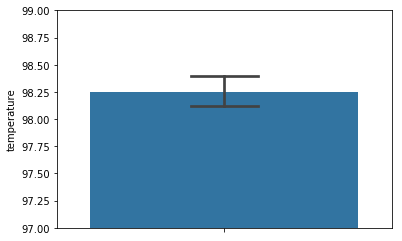

In [21]:
sns.barplot(y=temperature, data = df, ci=95, n_boot=1000, capsize=.2)
plt.ylim(97,99)
plt.show()

We can visually confirm that our sample's mean is statistically different from the 'normal' body temperature of 98.6.

## 4) Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

With a smaller sample size, the t-test is more appropriate to use.

In [22]:
import numpy as np
new_sample=np.random.choice(temperature, size = 10)
new_sample

array([ 98.6,  97.9,  98.2,  97.1,  99. ,  98.7,  98. ,  99.4,  97.1,  98.7])

In [23]:
stats.ttest_1samp(new_sample, 98.6)

Ttest_1sampResult(statistic=-1.3675024552383099, pvalue=0.20464275239040478)

This time we **cannot** reject the null hypothesis. let us try the z-test.

In [24]:
ztest(new_sample, value=98.6)

(-1.3675024552383102, 0.17146786821468152)

The pvalues of the two tests now both agree that we cannot reject our null hypothesis, but they are slightly less similar than before. the difference of 0.02 is enought that if you used the wrong test you might mak the wrong deciscion regarding rejecting the null hypothesis. 

## 5) At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

By using margin of error to calculate confidence intervals we can show were 95% of body temperatures means of samples taken from the population lie.

In [25]:
critical_z = stats.norm.ppf(q = 0.975)
stdev=df["temperature"].std()
margin_of_error = critical_z * (stdev/np.sqrt(n))
margin_of_error

0.1260343410491174

In [31]:
confidence_interval = (temperature.mean() - margin_of_error, temperature.mean() + margin_of_error)
confidence_interval

(98.123196428181657, 98.375265110279898)

Confidence intervals, however, are not the best way to show where the threshold between 'normal' and 'abnormal' lies. This is because they show where the men of any given sample taken from the same population will probably be. "Normal" isnt defined as the mean, but rather what most of the population will be. For that we want prediction intervals, which tell us where 95% of individual samples taken from the population will lie.

In [39]:
mean = np.mean(temperature)
prediction_interval = stats.norm.interval(0.95, loc=mean, scale=stdev)
prediction_interval

(96.812218185403111, 99.686243353058444)

So 95% of people's tempaeratures taken from the general population should fall between 96.8 and 99.6 degrees. If their temperature is outside of this, it is abnormal.

## 6) Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

First, lets examine the difference between the two means visually.

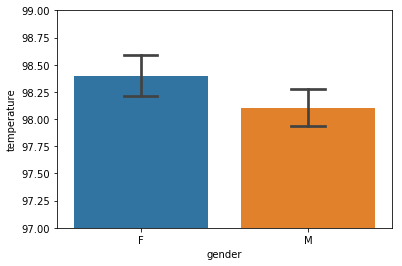

In [26]:
sns.barplot(x = "gender", y="temperature", data = df, ci=95, n_boot=1000, capsize=.2)
plt.ylim(97,99)
plt.show()

Visually, there does not appear to be a difference between the two means. However, since seaborn uses confidence intervals rather than the standard error of the mean as y-error bars, their overlappnig is no guarentee that that there is no statistically significant difference. 

In [27]:
male_data = df.loc[df['gender'] == 'M']
female_data = df.loc[df['gender'] == 'F']
stats.ttest_ind(male_data["temperature"], female_data["temperature"])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p-value of this t-test is below our alpha threshold and so me can reject the null hypothesis. However, the difference is small enough to be considered biologically irrelevant.